# Classification by Wine Type

## Wine Data
Data from http://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Citations
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at:
- [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
- [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
- [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
## Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
red_wine = pd.read_csv('data/winequality-red.csv')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

## EDA

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Looking at quality scores

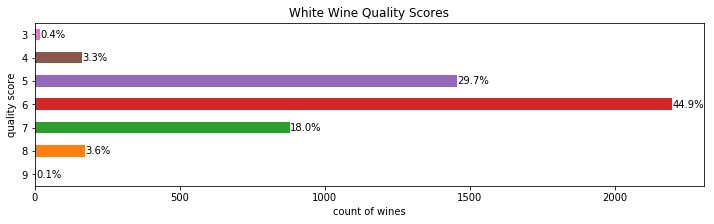

In [5]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index(
        ascending=False
    ).plot.barh(title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3))
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/4, 
            f'{bar.get_width()/df.shape[0]:.1%}'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

plot_quality_scores(white_wine, "white")

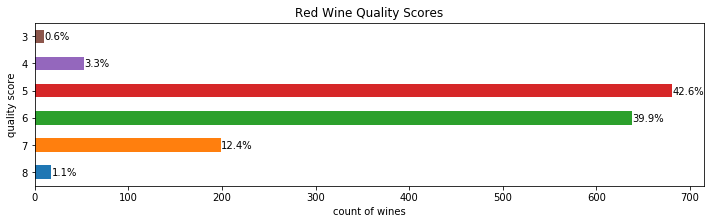

In [6]:
plot_quality_scores(red_wine, "red")

### Combining red and white wine data

In [7]:
wine = pd.concat([
    white_wine.assign(kind='white'), red_wine.assign(kind='red')
])
wine.sample(5, random_state=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
848,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,red
2529,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,white
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
1551,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
kind                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 685.2+ KB


In [9]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

In [10]:
wine.drop(columns='quality').groupby('kind').describe()

alcohol                                                  chlorides  \
        count       mean       std  min  25%   50%   75%   max     count   
kind                                                                       
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9    1599.0   
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2    4898.0   

                 ...  total sulfur dioxide        volatile acidity            \
           mean  ...                   75%    max            count      mean   
kind             ...                                                           
red    0.087467  ...                  62.0  289.0           1599.0  0.527821   
white  0.045772  ...                 167.0  440.0           4898.0  0.278241   

                                               
            std   min   25%   50%   75%   max  
kind                                           
red    0.179060  0.12  0.39  0.52  0.64  1.58  
white  0.100795  0.08  0.21  0.26  0.32  1.10  

[2 rows x 88 columns]

### How do chemical properties of the wine correlate to each other and the wine type?

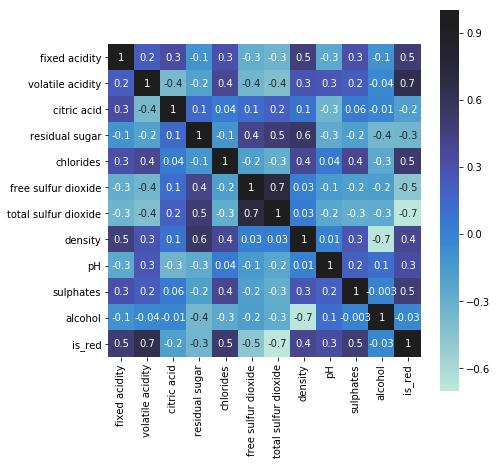

In [11]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    wine.drop(columns='quality').assign(
        is_red=lambda x: np.where(x.kind=='red', 1, 0)
    ).corr(), center=True, square=True, annot=True, fmt='.1g'
)

### Comparison of Red and White Wines by Their Chemical Properties

Text(0.5, 0.98, 'Comparing Chemical Properties of Red and White Wines')

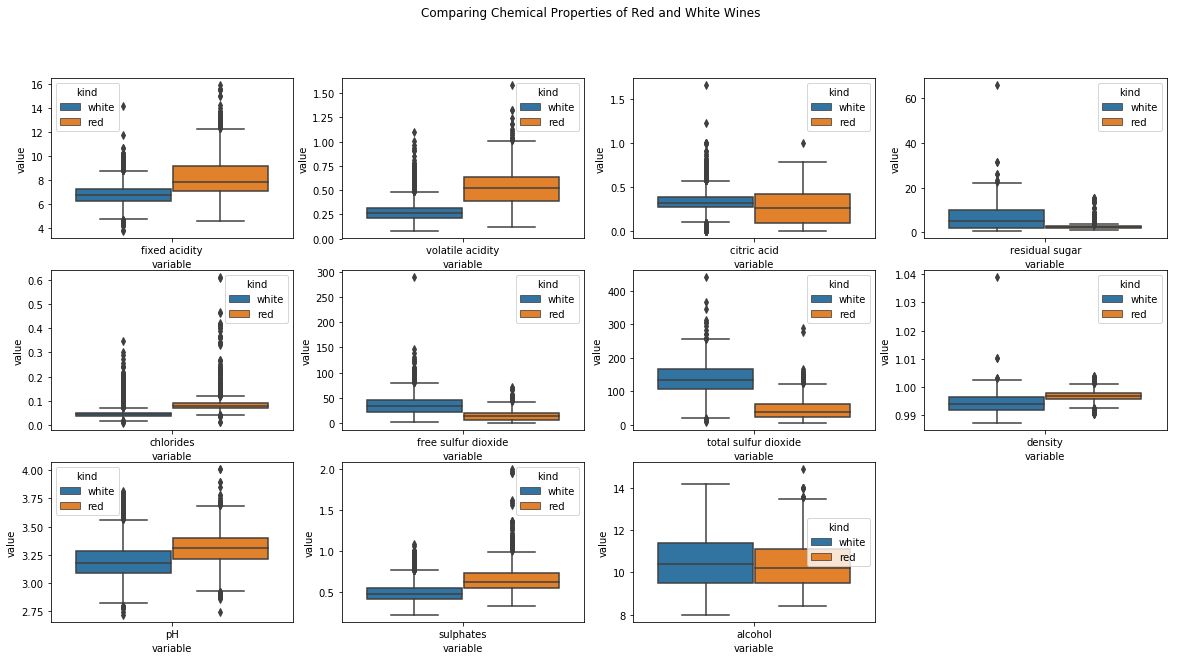

In [12]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]
melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(math.ceil(len(chemical_properties) / 4), 4, figsize=(20, 10))
axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])], 
        x='variable', y='value', hue='kind', ax=ax
    )
    
# remove the extra subplots
for ax in axes[len(chemical_properties):]:
    ax.remove()
    
plt.suptitle('Comparing Chemical Properties of Red and White Wines')

## Classification of Red and White Wines

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

wine_y = np.where(wine.kind == 'red', 1, 0)
wine_X = wine.drop(columns=['quality', 'kind'])

w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(
    wine_X, wine_y, test_size=0.25, random_state=0, stratify=wine_y
)

white_or_red = Pipeline([
    ('scale', StandardScaler()), ('lr', LogisticRegression(solver='lbfgs', random_state=0))
]).fit(w_X_train, w_y_train)

In [14]:
kind_preds = white_or_red.predict(w_X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(w_y_test, kind_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       0.99      0.98      0.98       400

   micro avg       0.99      0.99      0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



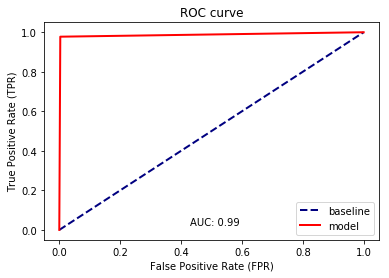

In [16]:
from utils import plot_roc

plot_roc(w_y_test, kind_preds)

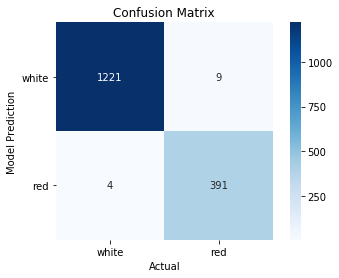

In [17]:
from utils import confusion_matrix_visual

confusion_matrix_visual(w_y_test, kind_preds, ['white', 'red'])